<a href="https://colab.research.google.com/github/yakimsanik/belhard/blob/master/HW6/pycaret_YA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

✓ Данные успешно загружены. Размер: (1143, 15)

🔧 Начинаем предобработку данных...
→ Удалено 382 строк с пропущенными значениями
✓ Предобработка завершена. Осталось признаков: 9

✓ Данные после обработки. Размер: (761, 9)

📋 Пример данных:


,ad_id,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,20,25,22,693.0,0,0.00,1.0,0.0



⚙️ Настраиваем эксперимент кластеризации...


,Description,Value
0,Session id,42
1,Original data shape,"(761, 9)"
2,Transformed data shape,"(761, 9)"
3,Numeric features,9
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore



✓ Эксперимент успешно настроен!

📊 Статистика данных после преобразований:


,Description,Value
0,Session id,42
1,Original data shape,"(761, 9)"
2,Transformed data shape,"(761, 9)"
3,Numeric features,9
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore



🔍 Тестируем алгоритмы кластеризации...

→ Тестируем kmeans с параметрами {'num_clusters': 6}...


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3811,564.4613,0.8691,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

 Визуализация для kmeans:


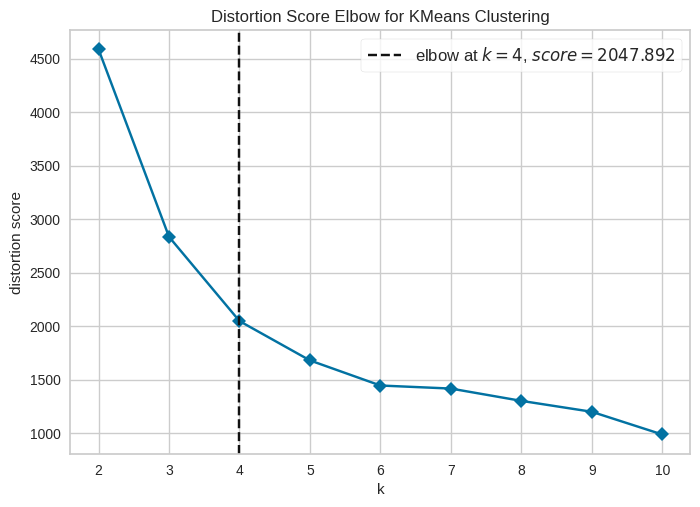

✓ Успешно. Silhouette: 0.381

→ Тестируем apcluster с параметрами {}...
× Не удалось создать модель apcluster: Estimator apcluster not available. Please see docstring for list of available estimators.

→ Тестируем meanshift с параметрами {}...


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4919,169.0489,0.5539,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

 Визуализация для meanshift:


✓ Успешно. Silhouette: 0.492

→ Тестируем hclust с параметрами {'n_clusters': 6}...


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4347,539.2753,0.9107,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

 Визуализация для hclust:


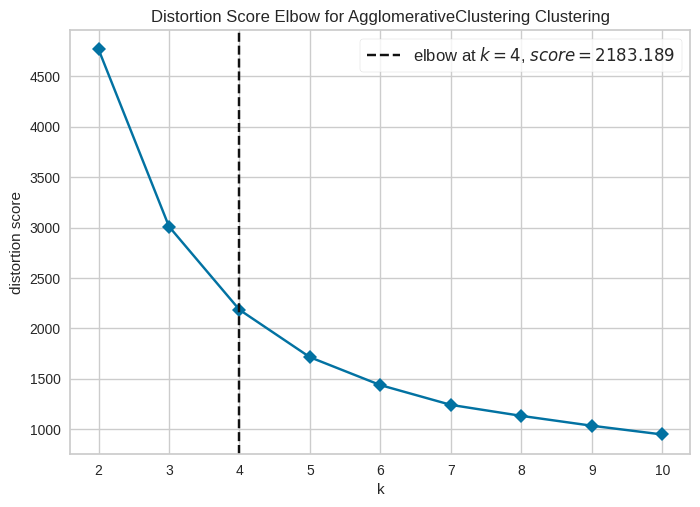

✓ Успешно. Silhouette: 0.435

→ Тестируем dbscan с параметрами {'eps': 0.5, 'min_samples': 6}...


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0077,47.4787,1.3833,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

 Визуализация для dbscan:


✓ Успешно. Silhouette: 0.008

→ Тестируем sc с параметрами {'n_clusters': 6}...


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4308,105.9347,0.4627,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

 Визуализация для sc:


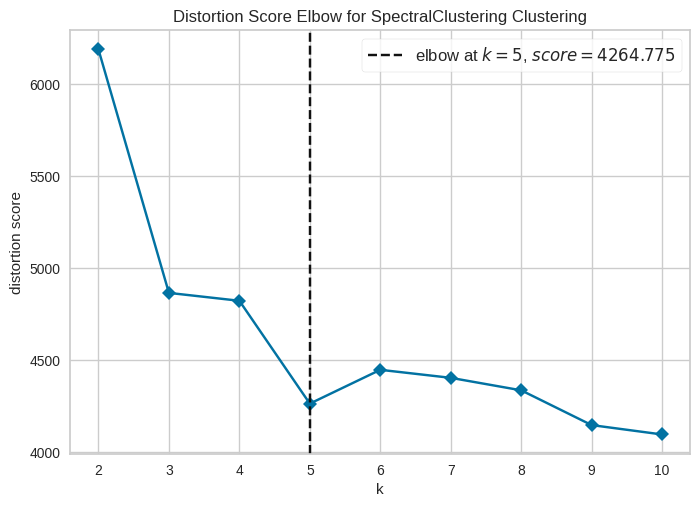

✓ Успешно. Silhouette: 0.431

→ Тестируем birch с параметрами {'n_clusters': 6}...


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4862,213.4553,0.7719,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

 Визуализация для birch:


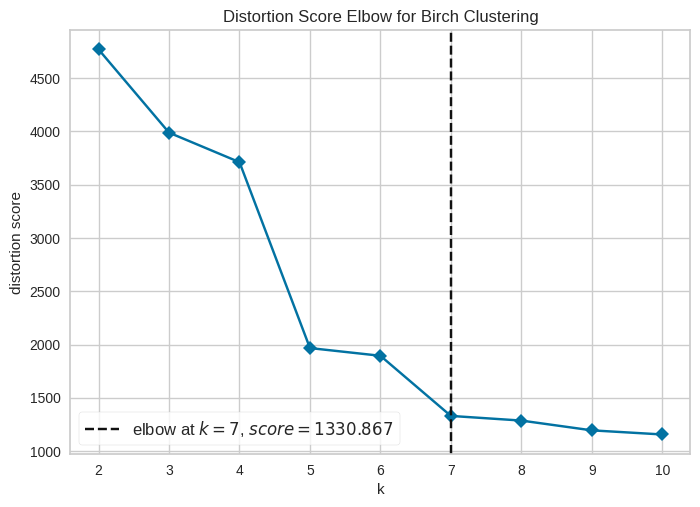

✓ Успешно. Silhouette: 0.486

🏆 Результаты сравнения:


,Model,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,meanshift,0.4919,169.0489,0.5539
0,birch,0.4862,213.4553,0.7719
0,hclust,0.4347,539.2753,0.9107
0,sc,0.4308,105.9347,0.4627
0,kmeans,0.3811,564.4613,0.8691
0,dbscan,0.0077,47.4787,1.3833



🎉 Лучшая модель: meanshift (Silhouette: 0.492)

✓ Лучшая модель готова к использованию!

🔎 Анализируем кластеры...

📊 Распределение объектов по кластерам:



📈 Средние значения по кластерам:


Cluster,Cluster 0,Cluster 1,Cluster 10,Cluster 11,Cluster 12,Cluster 13,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9
ad_id,874943.356340,915170.070588,1121108.000000,1121104.000000,1121100.000000,1121091.000000,1121303.600000,1121193.571429,1078610.176471,1121593.000000,1121452.000000,1121367.000000,1121206.000000,1121196.000000
interest1,20.712681,64.000000,16.000000,16.000000,15.000000,10.000000,22.650000,19.857143,16.529412,10.000000,16.000000,28.000000,29.000000,28.000000
interest2,24.210273,67.458824,20.000000,20.000000,20.000000,11.000000,26.050000,23.714286,20.352941,16.000000,21.000000,31.000000,34.000000,29.000000
interest3,24.186196,67.611765,18.000000,20.000000,17.000000,15.000000,26.350000,24.857143,20.235294,16.000000,22.000000,29.000000,31.000000,29.000000
impressions,49118.832031,58877.976562,984521.000000,2080666.000000,3052003.000000,1194718.000000,712098.250000,1077407.000000,464897.750000,1177535.000000,1663441.000000,1447755.000000,227925.000000,1392288.000000
clicks,7.945425,9.505882,95.000000,202.000000,340.000000,141.000000,100.700000,134.000000,76.411765,221.000000,205.000000,233.000000,22.000000,206.000000
spent,12.723354,15.431177,163.899994,360.149994,639.950012,254.050003,174.914505,238.987152,132.536484,365.660004,359.470001,420.579987,35.310001,358.549988
total_conversion,1.434992,1.400000,26.000000,40.000000,60.000000,28.000000,8.200000,21.428572,4.000000,15.000000,17.000000,11.000000,22.000000,31.000000
approved_conversion,0.492777,0.588235,14.000000,21.000000,17.000000,14.000000,2.600000,7.428571,1.294118,3.000000,6.000000,8.000000,12.000000,7.000000



🎨 Визуализация результатов:



💾 Результаты сохранены в clustering_results.csv

✅ Все этапы завершены успешно!


In [2]:
import pandas as pd
from pycaret.clustering import *
import plotly.express as px

# Проверка на загрузку данных
try:
    data = pd.read_csv('data.csv')
    print("✓ Данные успешно загружены. Размер:", data.shape)
except Exception as e:
    print("× Ошибка загрузки данных:", e)
    raise

# Функция предобработки
def preprocess_data(df):
    """Функция для предварительной обработки данных"""
    print("\n🔧 Начинаем предобработку данных...")

    # Удаление пропущенных значений
    initial_rows = len(df)
    df_clean = df.dropna()
    print(f"→ Удалено {initial_rows-len(df_clean)} строк с пропущенными значениями")

    # Выбираем только числовые признаки для кластеризации
    numeric_cols = df_clean.select_dtypes(include=['number']).columns.tolist()
    df_clean = df_clean[numeric_cols]

    # Логирование финального состояния
    print("✓ Предобработка завершена. Осталось признаков:", len(df_clean.columns))
    return df_clean

# Применяем предобработку
try:
    clust_data = preprocess_data(data)
    print("\n✓ Данные после обработки. Размер:", clust_data.shape)
    print("\n📋 Пример данных:")
    display(clust_data.head(3))
except Exception as e:
    print("× Ошибка при обработке данных:", e)
    raise

# Настройка эксперимента
def setup_clustering(data):
    """Настройка эксперимента кластеризации"""
    print("\n⚙️ Настраиваем эксперимент кластеризации...")

    # Проверка данных
    if len(data) < 10:
        raise ValueError("Слишком мало данных для кластеризации")

    # Настройка эксперимента с минимальными параметрами
    exp = setup(
        data=data,
        normalize=True,                # Нормализация данных
        normalize_method='zscore',     # Z-score нормализация
        session_id=42,                 # Для воспроизводимости
        verbose=True                   # Вывод информации
    )
    return exp

try:
    exp = setup_clustering(clust_data)
    print("\n✓ Эксперимент успешно настроен!")
    print("\n📊 Статистика данных после преобразований:")
    display(pull())
except Exception as e:
    print("× Ошибка при настройке эксперимента:", e)
    raise

# функция тестирования моделей
def test_clustering_models():
    """Тестирование различных алгоритмов кластеризации"""
    print("\n🔍 Тестируем алгоритмы кластеризации...")

    # Доступные алгоритмы с настройками по умолчанию
    models_to_test = {
        'kmeans': {'num_clusters': 6},          # K-means
        'apcluster': {},                        # Affinity Propagation
        'meanshift': {},                        # Mean Shift
        'hclust': {'n_clusters': 6},            # Agglomerative Clustering
        'dbscan': {'eps': 0.5, 'min_samples': 6}, # DBSCAN
        'sc': {'n_clusters': 6},                # Spectral Clustering
        'birch': {'n_clusters': 6}              # BIRCH
    }

    results = []

    for model_name, params in models_to_test.items():
        try:
            print(f"\n→ Тестируем {model_name} с параметрами {params}...")
            model = create_model(model_name, **params)

            # Получаем метрики
            metrics = pull()
            metrics['Model'] = model_name
            results.append(metrics)

            # Визуализация
            try:
                print(f" Визуализация для {model_name}:")
                plot_model(model, plot='cluster')
                if model_name in ['kmeans', 'hclust', 'sc', 'birch']:
                    plot_model(model, plot='elbow')
            except Exception as e:
                print(f" Ошибка визуализации: {str(e)}")

            print(f"✓ Успешно. Silhouette: {metrics['Silhouette'][0]:.3f}")

        except Exception as e:
            print(f"× Не удалось создать модель {model_name}: {str(e)}")
            continue

    # Анализ результатов
    if results:
        comparison_df = pd.concat(results)
        print("\n🏆 Результаты сравнения:")
        display(comparison_df[['Model', 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']]
               .sort_values('Silhouette', ascending=False))

        # Выбираем лучшую модель
        best_model_info = comparison_df.sort_values('Silhouette', ascending=False).iloc[0]
        print(f"\n🎉 Лучшая модель: {best_model_info['Model']} (Silhouette: {best_model_info['Silhouette']:.3f})")

        return create_model(best_model_info['Model'], verbose=False)
    else:
        raise ValueError("Ни одна модель не была успешно создана")

# Тестируем модели
try:
    best_model = test_clustering_models()
    print("\n✓ Лучшая модель готова к использованию!")
except Exception as e:
    print("× Ошибка при тестировании моделей:", e)
    raise

# Анализ кластеров
def analyze_clusters(model):
    """Анализ результатов кластеризации"""
    print("\n🔎 Анализируем кластеры...")

    # Назначение кластеров
    clustered_data = assign_model(model)

    # Распределение по кластерам
    print("\n📊 Распределение объектов по кластерам:")
    cluster_dist = clustered_data['Cluster'].value_counts().reset_index()
    cluster_dist.columns = ['Cluster', 'Count']

    fig = px.bar(cluster_dist, x='Cluster', y='Count',
                 title='Распределение объектов по кластерам',
                 color='Cluster', text='Count')
    fig.update_traces(texttemplate='%{text}', textposition='outside')
    fig.show()

    # Характеристики кластеров
    print("\n📈 Средние значения по кластерам:")
    cluster_stats = clustered_data.groupby('Cluster').mean().T
    display(cluster_stats.style.background_gradient(cmap='Blues'))

    # Визуализация
    print("\n🎨 Визуализация результатов:")
    try:
        plot_model(model, plot='cluster')
        plot_model(model, plot='distribution')
        if hasattr(model, 'labels_'):
            plot_model(model, plot='tsne')
    except Exception as e:
        print(f"× Ошибка визуализации: {e}")

    return clustered_data

# Выполняем анализ
try:
    final_data = analyze_clusters(best_model)

    # Сохраняем результаты
    final_data.to_csv('clustering_results.csv', index=False)
    print("\n💾 Результаты сохранены в clustering_results.csv")
    print("\n✅ Все этапы завершены успешно!")
except Exception as e:
    print("× Ошибка при анализе кластеров:", e)

